---
<div align="center">

# Particle Swarm Optimization with Pyswarms
</div>

---

In [1]:
%load_ext autoreload
%autoreload 2

# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyswarms as ps
from pyswarms.single import (GlobalBestPSO)
from pyswarms.utils.functions.single_obj import (sphere, rastrigin, rosenbrock)
from pyswarms.utils.plotters import (plot_contour, plot_cost_history)
from pyswarms.utils.plotters.formatters import (Designer, Mesher)
from IPython.display import (Image)
from CustomPlotters import (my_plot_surface)

---
<div align="center">

## Utility Functions
</div>

---

In [3]:
def getCostHistory(optimizer:GlobalBestPSO, config:dict, length:int, width:int) -> None:
    """
    # Description
        -> The getCostHistory function allows to get the plot with the cost associated with the particles movement cost throughout all the iterations performed
    := param: optimizer - Optimizer used
    := param: config - Configuration 
    := param: length - Length of the Plot
    := param: width - Width of the Plot
    := return: None, since we are only plotting data
    """
    # Plot the cost over Iterations Axes
    costHistoryAxes = plot_cost_history(cost_history = optimizer.cost_history)
    
    # Fetch the Figure associated with the Axes
    costFigure = costHistoryAxes.get_figure()
    
    # Resize the cost figure
    costFigure.set_size_inches(length, width)

    # Save the Plot
    if config['save_results']:
        costFigure.savefig(f"./{config['cost_history_folder_results']}/{config['cost_history_filename_result']}", dpi=300)

    # Close the Plot to display the results below using markdown
    plt.close()

---
<div align="center">

## Sphere Function
</div>

---

In [4]:
# Define the parameters used in PSO within a config dictionary
sphereConfig = {'d':2,
                'w':0.5,
                'c1':1.5,
                'c2':0.8,
                'n_particles':20,
                'n_iterations':300,
                'save_results':False,
                'cost_history_folder_results':'Cost History',
                'cost_history_filename_result':'SphereCostHistory',
                'search_folder_results':'Particle Searches',
                'search_filename_result':'SphereParticlesSearch'
               }

# Define the bounds for the experiment
lim = ([-5.12, -5.12], [5.12, 5.12])

In [5]:
# Create a new instance of a Optimizer
sphereOptimizer = ps.single.GlobalBestPSO(n_particles=sphereConfig['n_particles'], dimensions=sphereConfig['d'], options=sphereConfig, bounds=lim)

# Perform Optimization
cost, pos = sphereOptimizer.optimize(sphere, iters=sphereConfig['n_iterations'])

2024-09-19 01:02:29,064 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'d': 2, 'w': 0.5, 'c1': 1.5, 'c2': 0.8, 'n_particles': 20, 'n_iterations': 300, 'save_results': False, 'cost_history_folder_results': 'Cost History', 'cost_history_filename_result': 'SphereCostHistory', 'search_folder_results': 'Particle Searches', 'search_filename_result': 'SphereParticlesSearch'}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|300/300, best_cost=1.3e-79
2024-09-19 01:02:29,650 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.2980240468070716e-79, best pos: [1.95675955e-40 3.02511695e-40]


In [6]:
# Get the Cost History
getCostHistory(sphereOptimizer, sphereConfig, 7, 5)

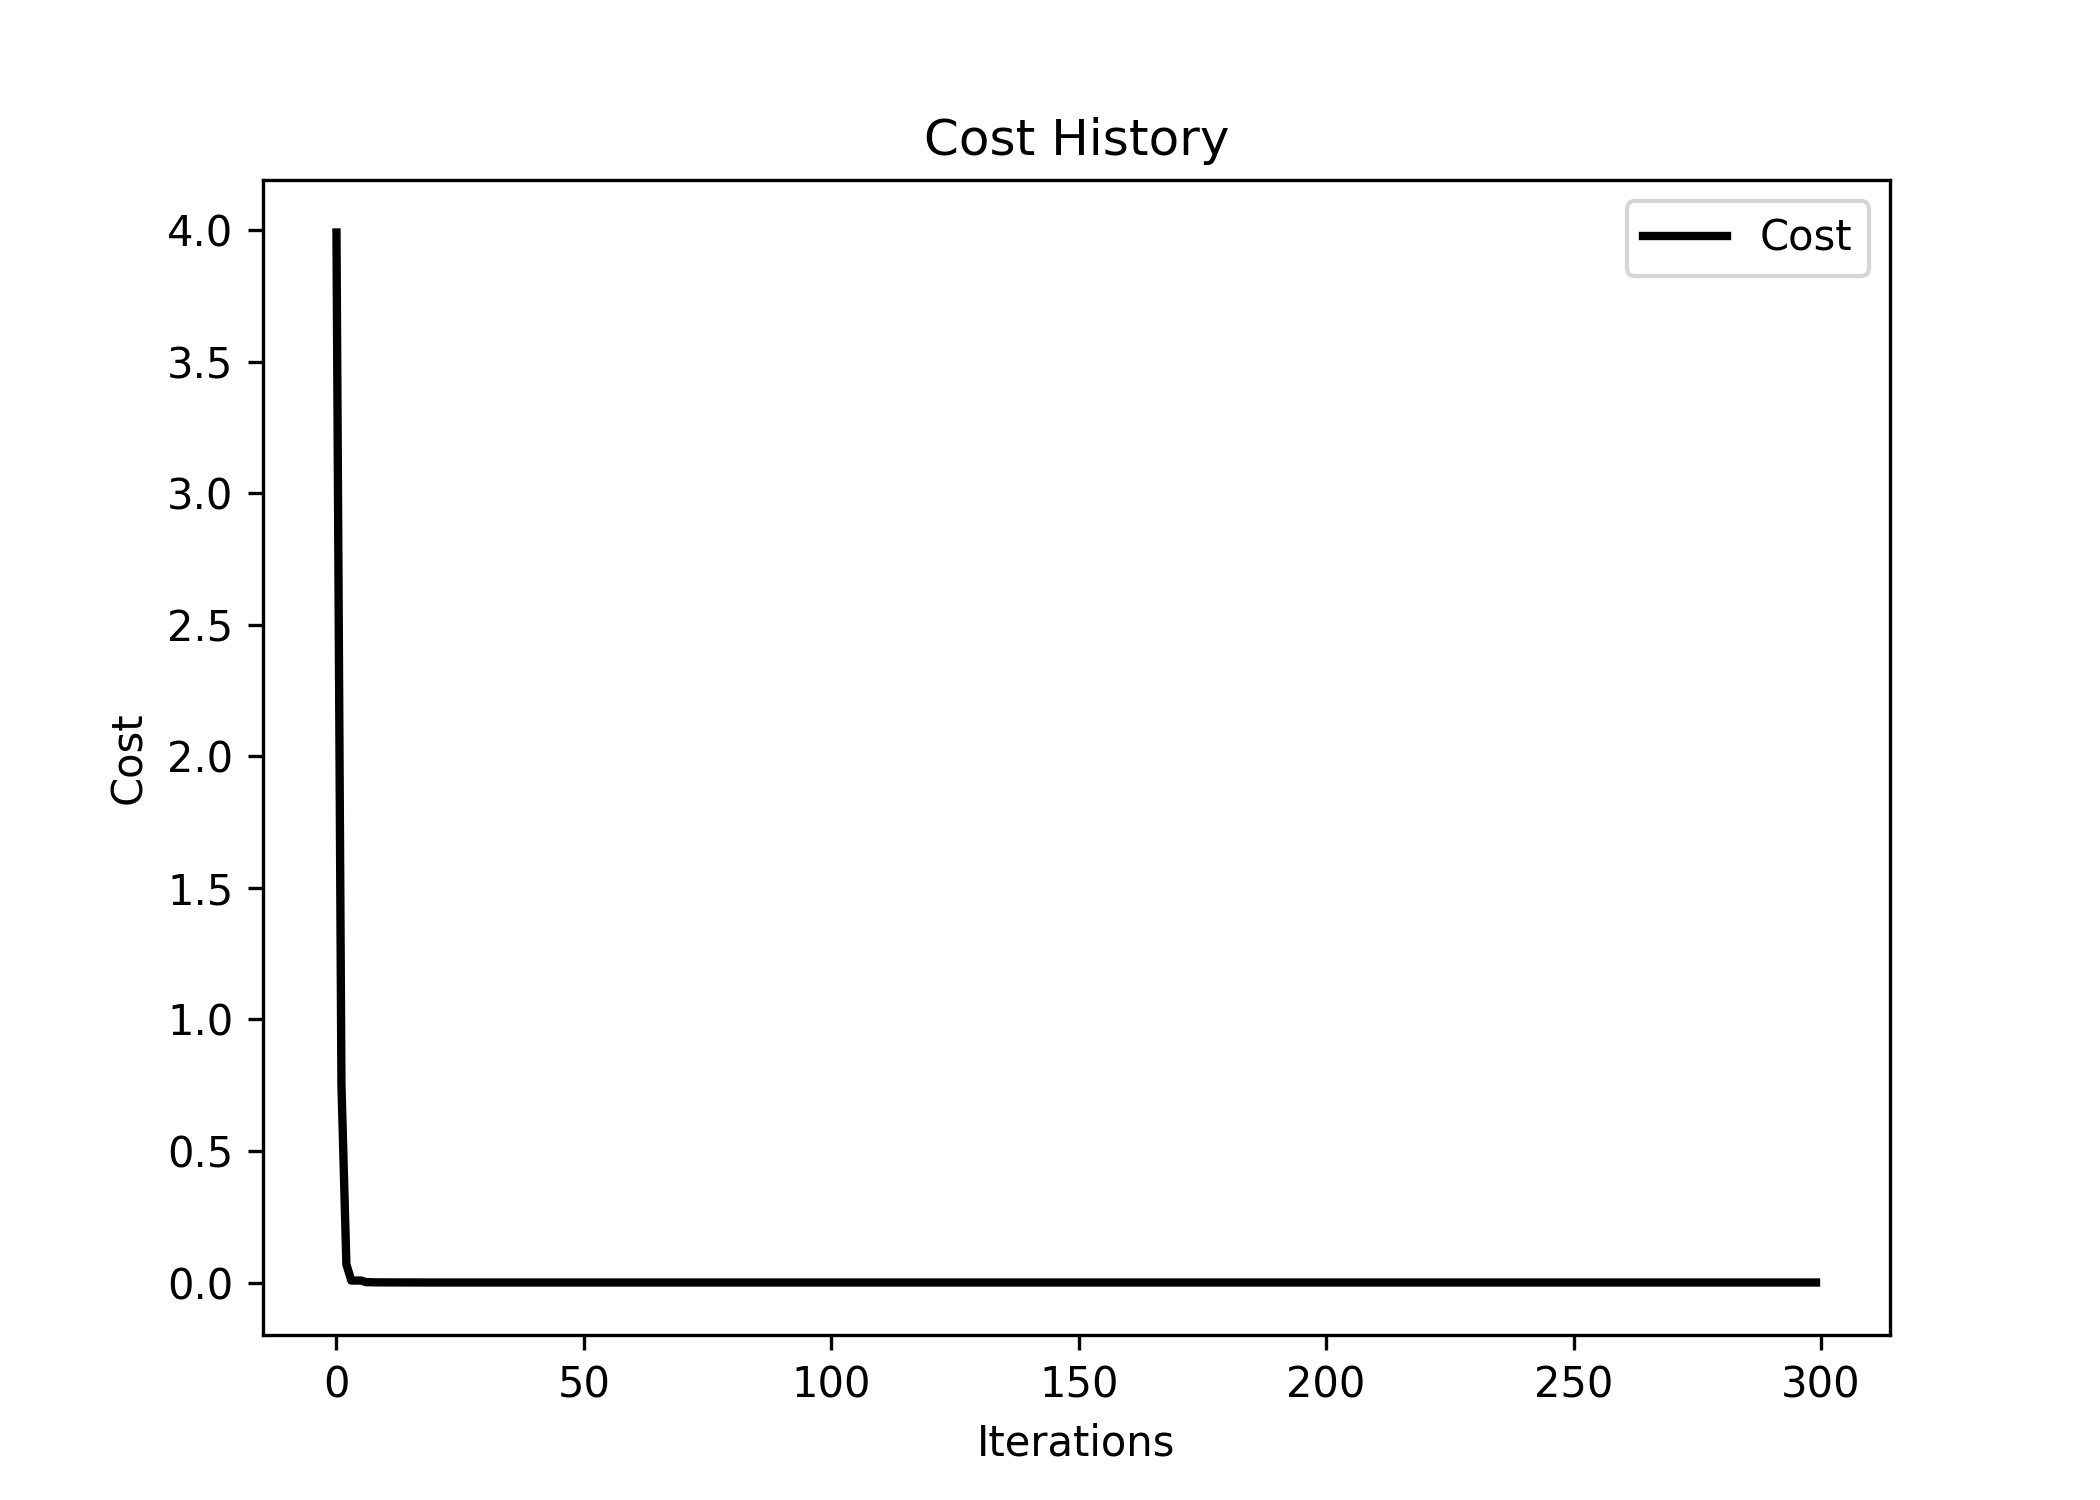

In [7]:
# Plot the Cost History
Image(data="./Cost History/SphereCostHistory.png", width=600)

In [8]:
# Create a Mesher
m = Mesher(func=sphere,
           limits=[(-5.12, 5.12), (-5.12, 5.12)], 
           levels=np.arange(-2, 80.0, 8))

# Create a Designer
d = Designer(limits=[(-5.12,5.12), (-5.12,5.12), (-1,100)], 
             label=['x-axis', 'y-axis', 'z-axis'],
             title_fontsize=20)

# Create an Animation
animation = plot_contour(pos_history=sphereOptimizer.pos_history,
                         mesher=m,
                         mark=(0,0),
                         designer = d)

# Save the animation
if sphereConfig['save_results']:
    animation.save(f"./{sphereConfig['search_folder_results']}/2D_{sphereConfig['search_filename_result']}.gif", fps=30)

# Close the Plot to display the results below in a gif
plt.close()

![2D Sphere Particles Search](./Particle%20Searches/2D_SphereParticlesSearch.gif)

In [10]:
# Compute 3D History
pos_history_3d = m.compute_history_3d(sphereOptimizer.pos_history) # preprocessing

# Create a 3D Animation
animation3d = my_plot_surface(pos_history=pos_history_3d,
                              mesher=m,
                              designer=d,
                              mark=(0,0,0),
                              cap_z_values=False)

# Save the animation
if sphereConfig['save_results']:
    animation3d.save(f"./{sphereConfig['search_folder_results']}/3D_{sphereConfig['search_filename_result']}.gif", fps=30)

# Close the Plot to display the results below in a gif
plt.close()

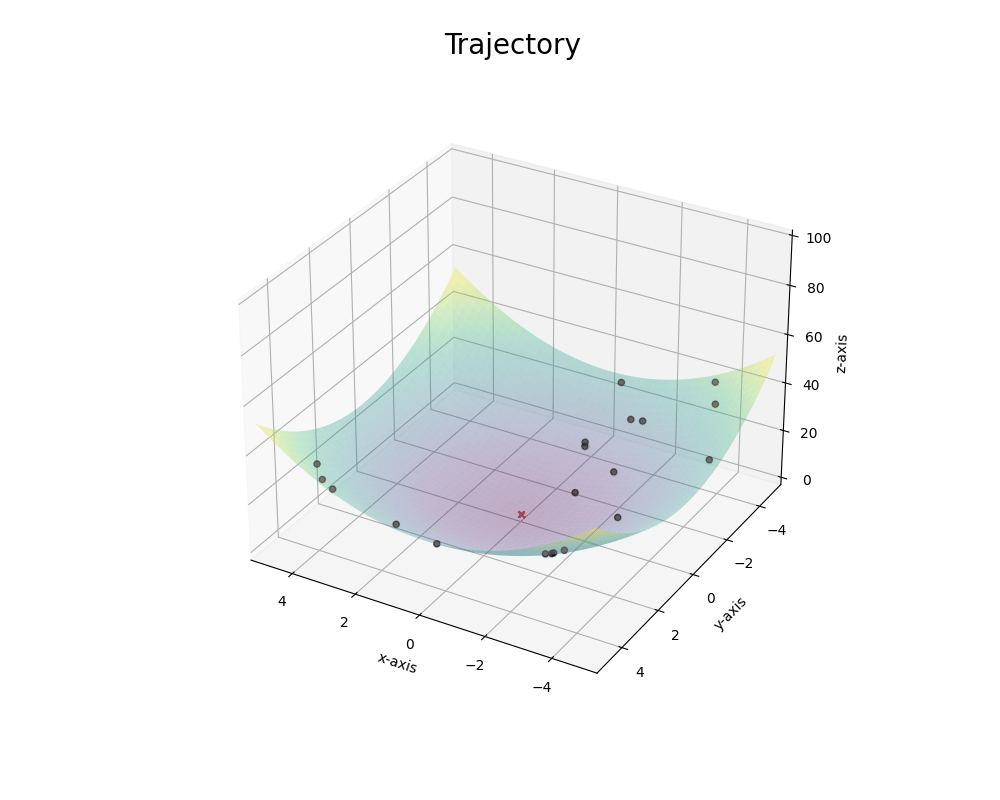

In [11]:
# Plot the 3D Trajectory
Image(data="./Particle Searches/3D_SphereParticlesSearch.gif", width=600)

---
<div align="center">

## Rastrigin Function
</div>

---

In [12]:
# Define the parameters used in PSO within a config dictionary
rastriginConfig = {'d':2,
                   'w':0.5,
                   'c1':1.5,
                   'c2':0.8,
                   'n_particles':20,
                   'n_iterations':300,
                   'save_results':False,
                   'cost_history_folder_results':'Cost History',
                   'cost_history_filename_result':'RastriginCostHistory',
                   'search_folder_results':'Particle Searches',
                   'search_filename_result':'RastriginParticlesSearch'
                  }

# Define the bounds for the experiment
lim = ([-5.12, -5.12], [5.12, 5.12])

In [13]:
# Create a new instance of a Optimizer
rastriginOptimizer = ps.single.GlobalBestPSO(n_particles=rastriginConfig['n_particles'], dimensions=rastriginConfig['d'], options=rastriginConfig, bounds=lim)

# Perform Optimization
cost, pos = rastriginOptimizer.optimize(rastrigin, iters=rastriginConfig['n_iterations'])

2024-09-19 01:03:04,443 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'d': 2, 'w': 0.5, 'c1': 1.5, 'c2': 0.8, 'n_particles': 20, 'n_iterations': 300, 'save_results': False, 'cost_history_folder_results': 'Cost History', 'cost_history_filename_result': 'RastriginCostHistory', 'search_folder_results': 'Particle Searches', 'search_filename_result': 'RastriginParticlesSearch'}
pyswarms.single.global_best: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|300/300, best_cost=0
2024-09-19 01:03:05,166 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [-6.02432064e-10 -1.00285431e-09]


In [14]:
# Get the Cost History
getCostHistory(rastriginOptimizer, rastriginConfig, 7, 5)

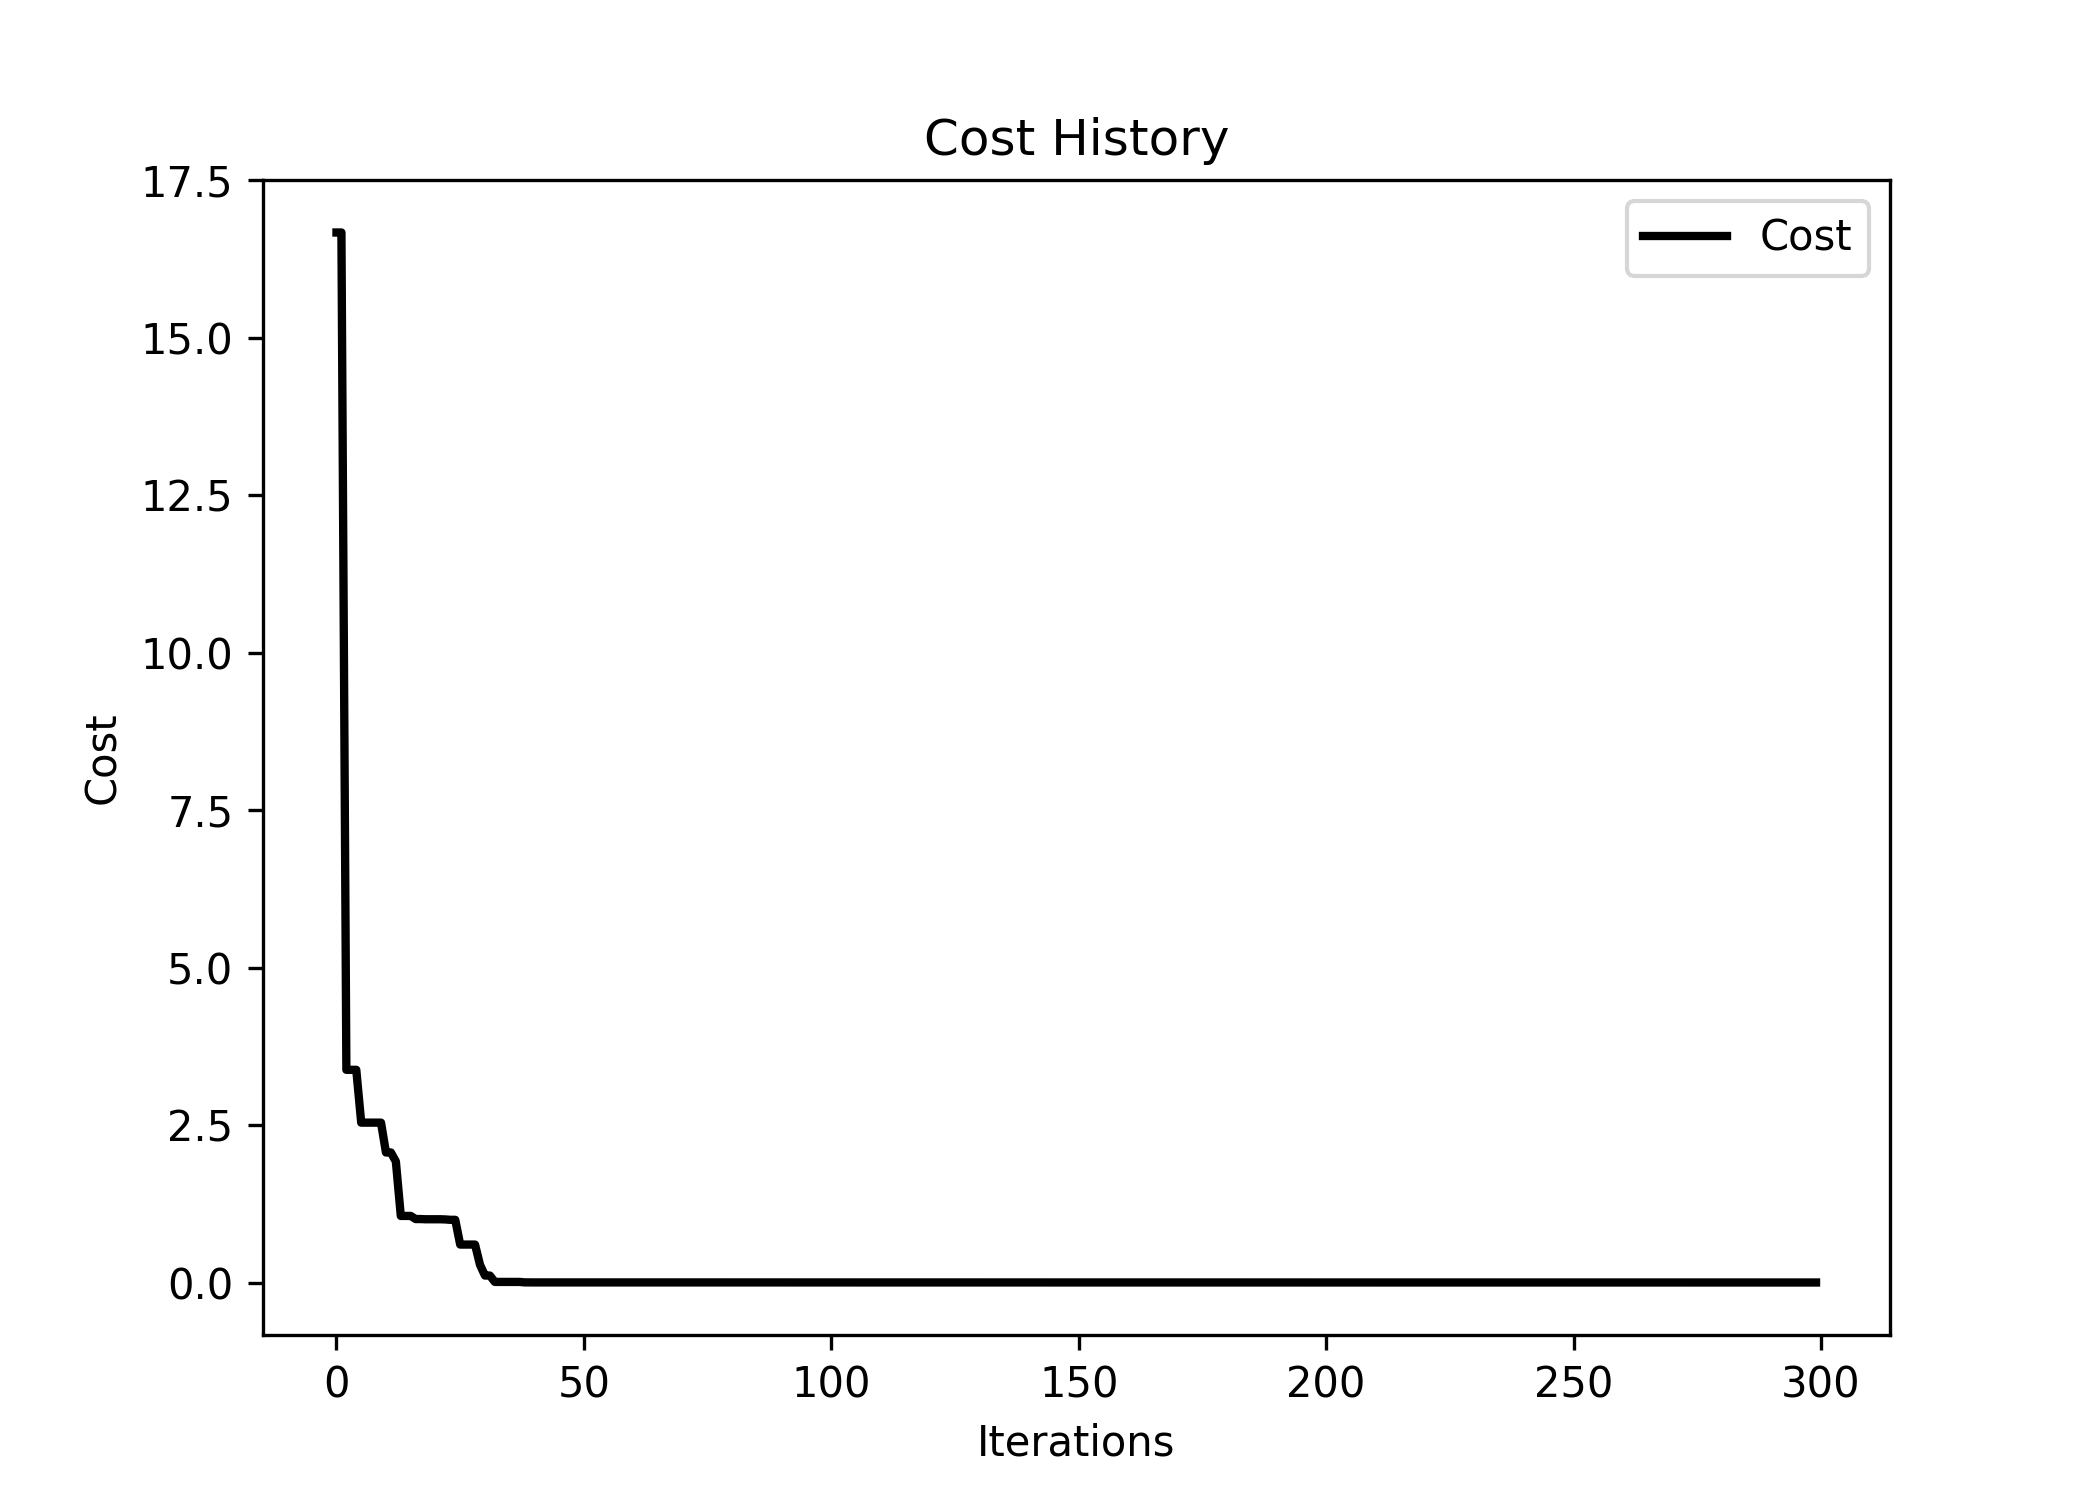

In [15]:
# Plot the Cost History
Image(data="./Cost History/RastriginCostHistory.png", width=600)

In [16]:
# Create a Mesher
m = Mesher(func=rastrigin,
           limits=[(-5.12, 5.12), (-5.12, 5.12)], 
           levels=np.arange(-2, 80.0, 8))

# Create a Designer
d = Designer(limits=[(-5.12,5.12), (-5.12,5.12), (-1,100)], 
             label=['x-axis', 'y-axis', 'z-axis'],
             title_fontsize=20)

# Create an Animation
animation = plot_contour(pos_history=rastriginOptimizer.pos_history,
                         mesher=m,
                         mark=(0,0),
                         designer = d)

# Save the animation
if rastriginConfig['save_results']:
    animation.save(f"./{rastriginConfig['search_folder_results']}/2D_{rastriginConfig['search_filename_result']}.gif", fps=30)

# Close the Plot to display the results below in a gif
plt.close()

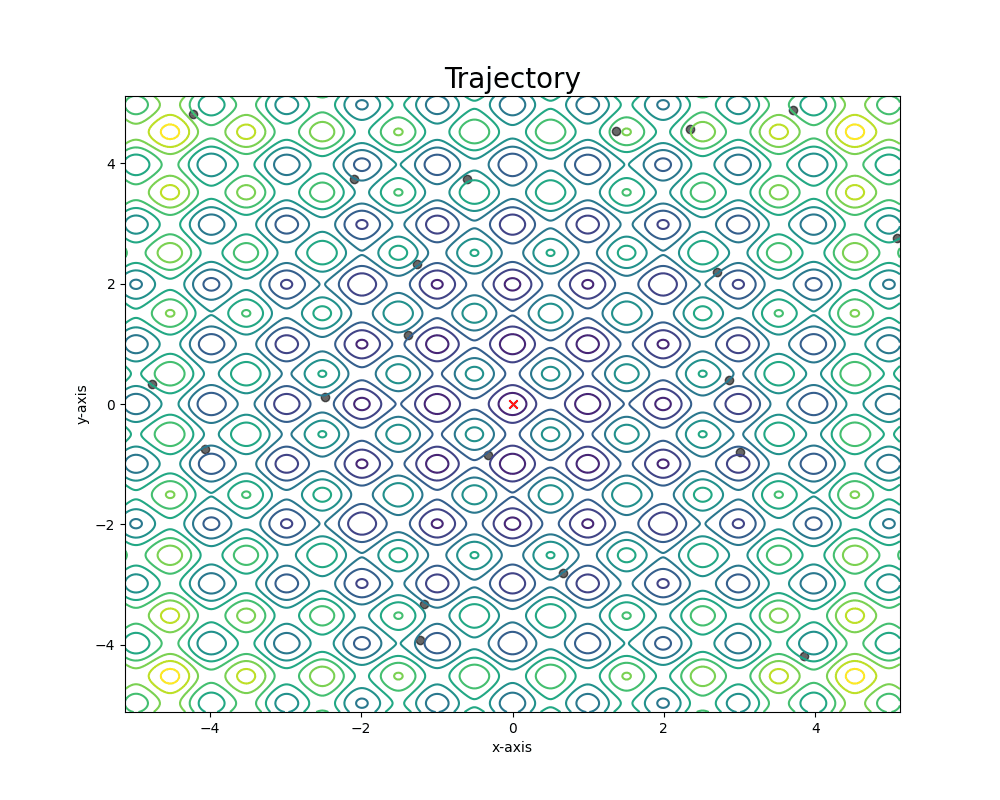

In [17]:
# Plot the 2D Trajectory
Image(data="./Particle Searches/2D_RastriginParticlesSearch.gif", width=600)

In [18]:
# Compute 3D History
pos_history_3d = m.compute_history_3d(rastriginOptimizer.pos_history) # preprocessing

# Create a 3D Animation
animation3d = my_plot_surface(pos_history=pos_history_3d,
                              mesher=m,
                              designer=d,
                              mark=(0,0,0),
                              cap_z_values=False)

# Save the animation
if rastriginConfig['save_results']:
    animation3d.save(f"./{rastriginConfig['search_folder_results']}/3D_{rastriginConfig['search_filename_result']}.gif", fps=30)

# Close the Plot to display the results below in a gif
plt.close()

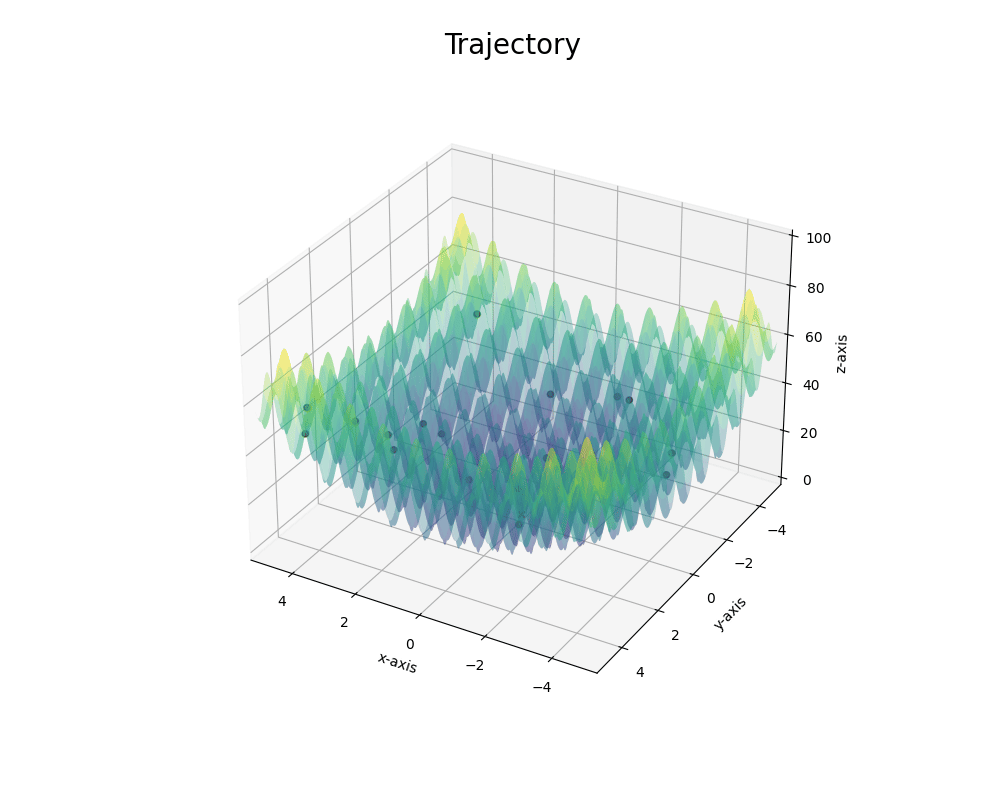

In [19]:
# Plot the 3D Trajectory
Image(data="./Particle Searches/3D_RastriginParticlesSearch.gif", width=600)

---
<div align="center">

## Rosenbrock Function
</div>

---

In [20]:
# Define the parameters used in PSO within a config dictionary
rosenbrockConfig = {'d':2,
                    'w':0.5,
                    'c1':1.5,
                    'c2':0.8,
                    'n_particles':20,
                    'n_iterations':300,
                    'save_results':False,
                    'cost_history_folder_results':'Cost History',
                    'cost_history_filename_result':'RosenbrockCostHistory',
                    'search_folder_results':'Particle Searches',
                    'search_filename_result':'RosenbrockParticlesSearch'
                   }

# Define the bounds for the experiment
lim = ([-5.12, -5.12], [5.12, 5.12])

In [21]:
# Create a new instance of a Optimizer
rosenbrockOptimizer = ps.single.GlobalBestPSO(n_particles=rosenbrockConfig['n_particles'], dimensions=rosenbrockConfig['d'], options=rosenbrockConfig, bounds=lim)

# Perform Optimization
cost, pos = rosenbrockOptimizer.optimize(rosenbrock, iters=rosenbrockConfig['n_iterations'])

2024-09-19 01:03:55,487 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'d': 2, 'w': 0.5, 'c1': 1.5, 'c2': 0.8, 'n_particles': 20, 'n_iterations': 300, 'save_results': False, 'cost_history_folder_results': 'Cost History', 'cost_history_filename_result': 'RosenbrockCostHistory', 'search_folder_results': 'Particle Searches', 'search_filename_result': 'RosenbrockParticlesSearch'}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|300/300, best_cost=5.86e-20
2024-09-19 01:03:56,632 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.864674666834662e-20, best pos: [1. 1.]


In [22]:
# Get the Cost History
getCostHistory(rosenbrockOptimizer, rosenbrockConfig, 7, 5)

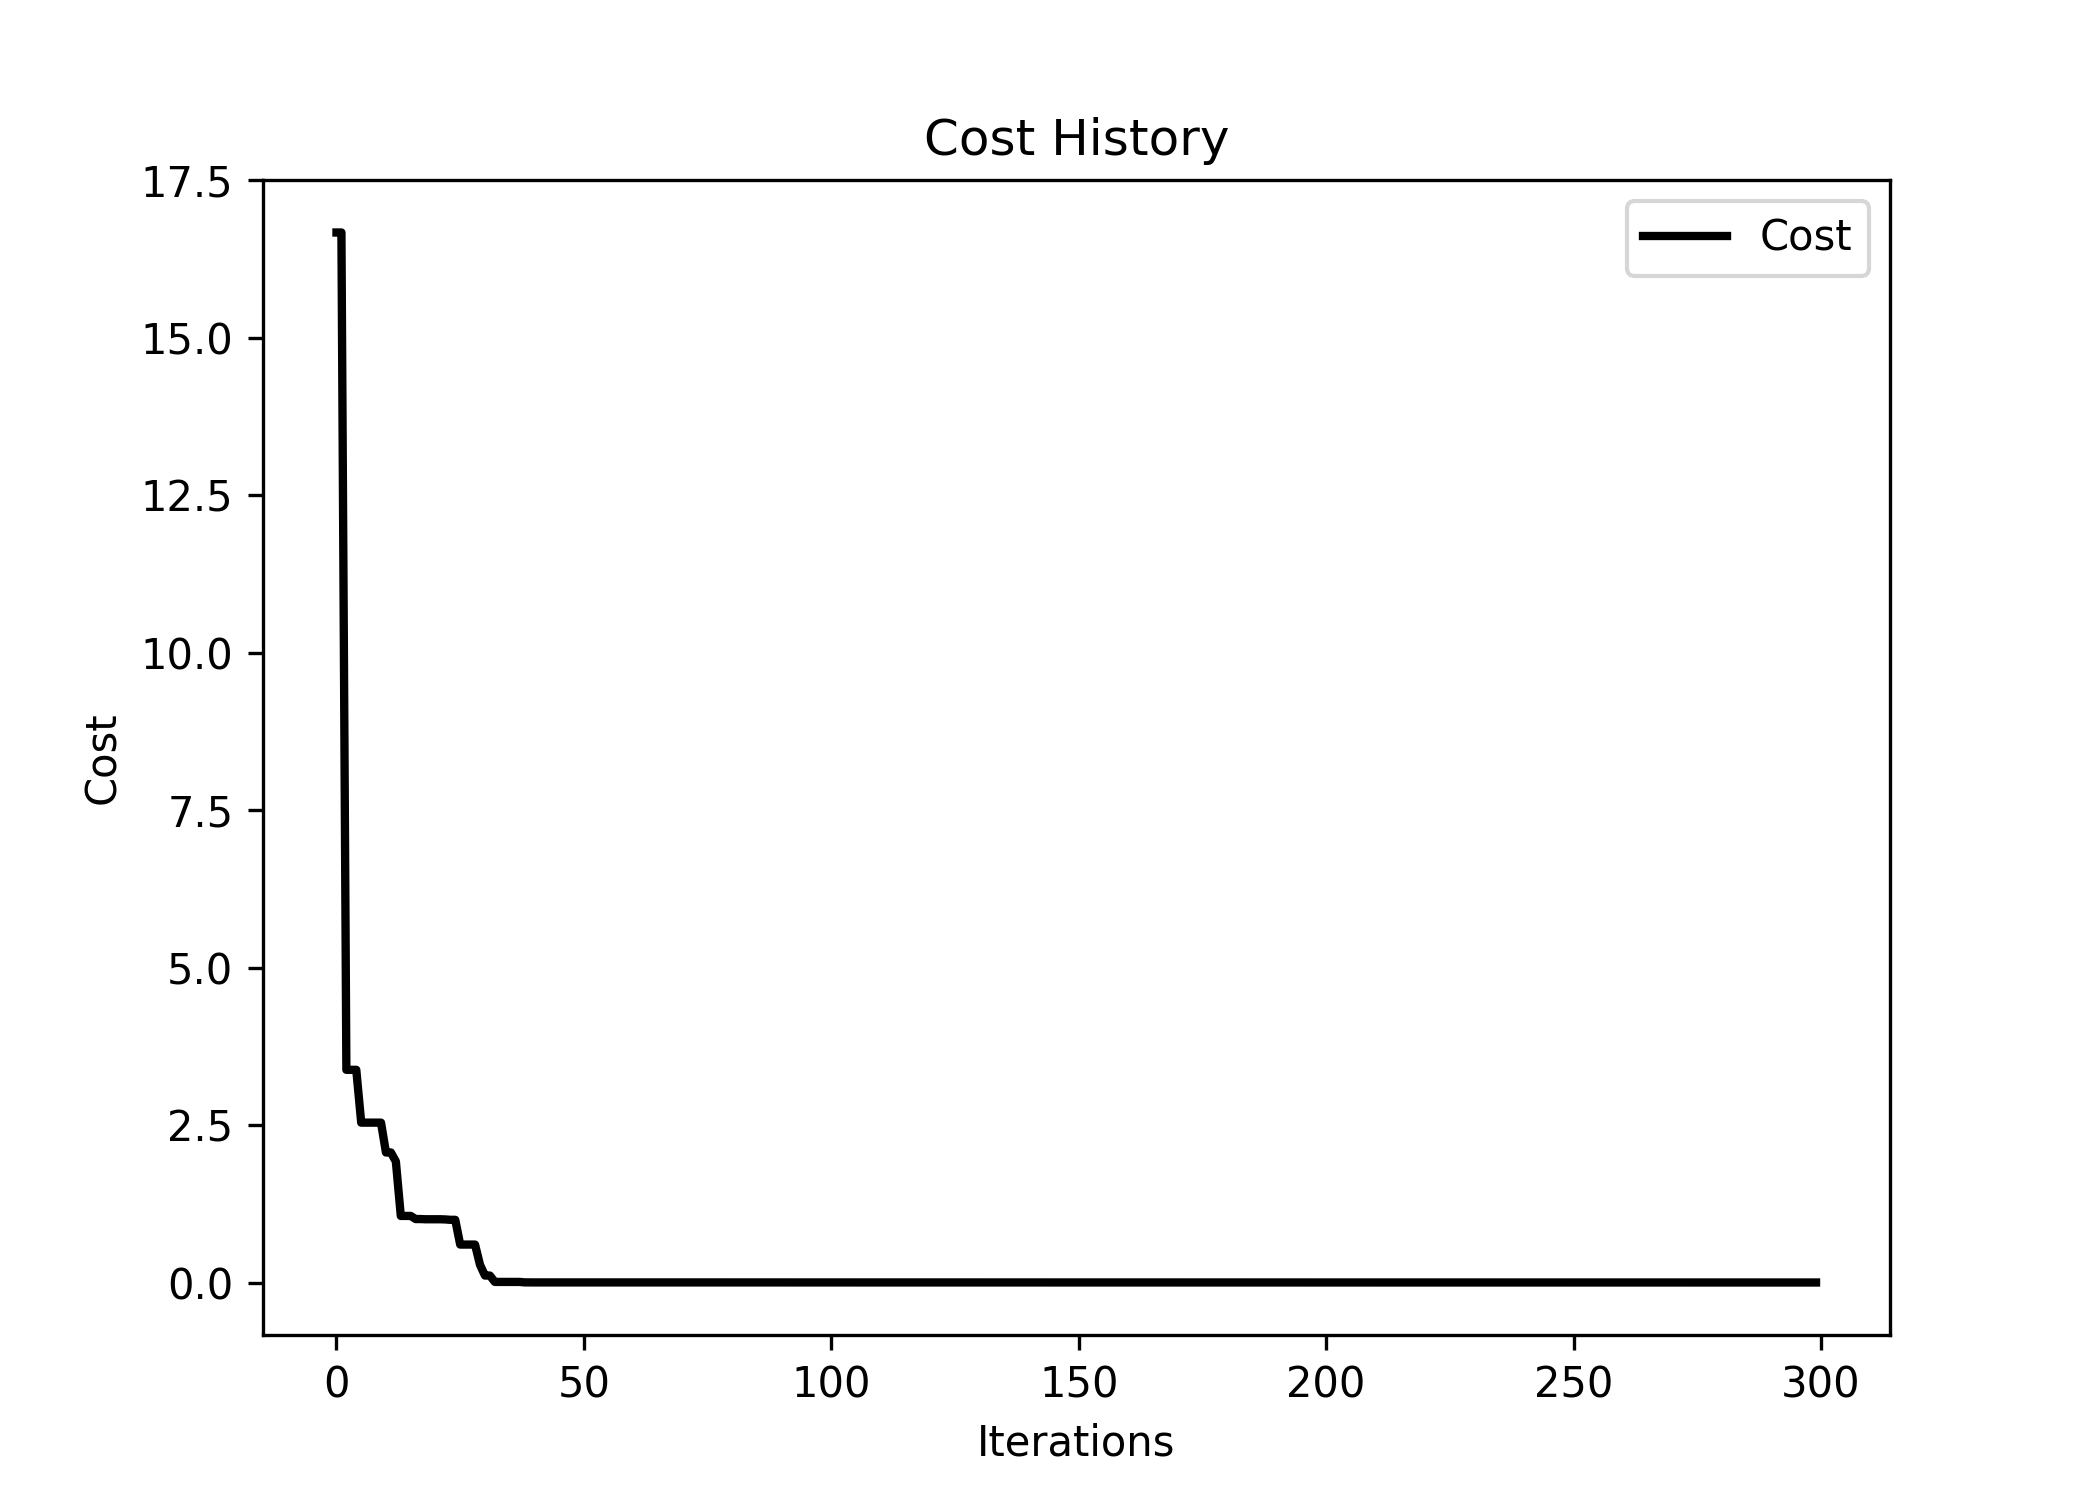

In [23]:
# Plot the Cost History
Image(data="./Cost History/RastriginCostHistory.png", width=600)

In [24]:
# Create a Mesher
m = Mesher(func=rosenbrock,
           limits=[(-5.12, 5.12), (-5.12, 5.12)],
           levels=np.arange(-2, 80.0, 8))

# Create a Designer
d = Designer(limits=[(-5.12,5.12), (-5.12,5.12), (-1,100)],
             label=['x-axis', 'y-axis', 'z-axis'],
             title_fontsize=20)

# Create an Animation
animation = plot_contour(pos_history=rosenbrockOptimizer.pos_history,
                         mesher=m,
                         mark=(0,0),
                         designer = d)

# Save the animation
if rosenbrockConfig['save_results']:
    animation.save(f"./{rosenbrockConfig['search_folder_results']}/2D_{rosenbrockConfig['search_filename_result']}.gif", fps=30)

# Close the Plot to display the results below in a gif
plt.close()

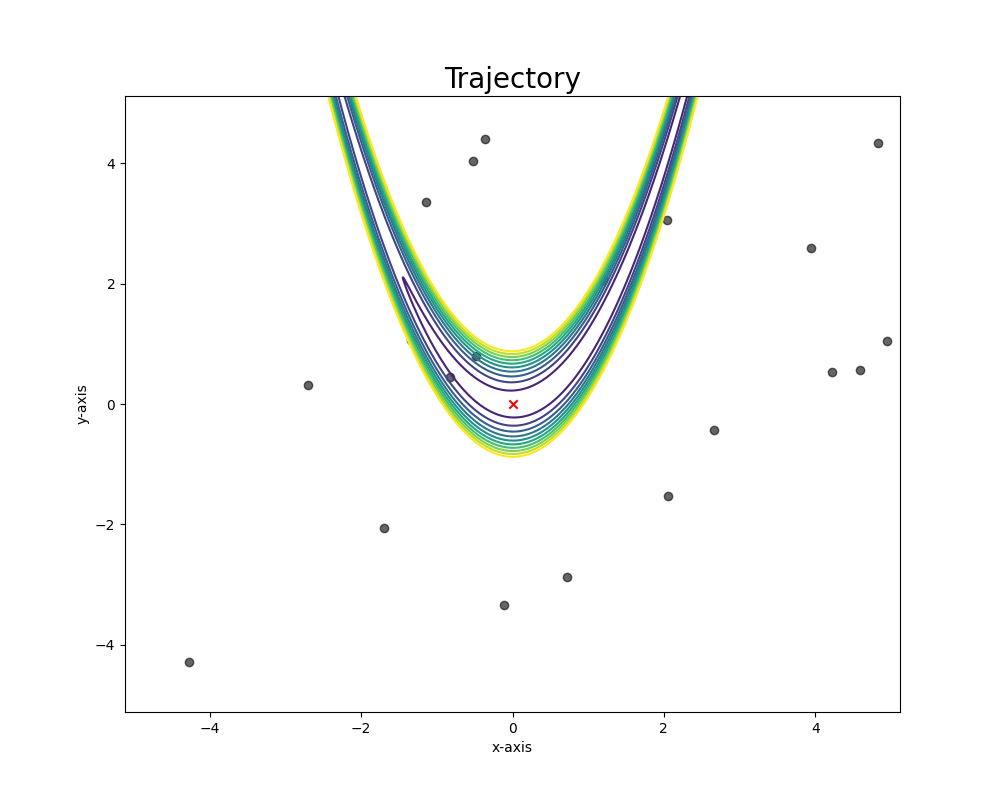

In [25]:
# Plot the 2D Trajectory
Image(data="./Particle Searches/2D_RosenbrockParticlesSearch.gif", width=600)

In [26]:
# Compute 3D History
pos_history_3d = m.compute_history_3d(rosenbrockOptimizer.pos_history) # preprocessing

# Create a 3D Animation
animation3d = my_plot_surface(pos_history=pos_history_3d,
                              mesher=m,
                              designer=d,
                              mark=(0,0,0),
                              cap_z_values=True)

# Save the animation
if rosenbrockConfig['save_results']:
    animation3d.save(f"./{rosenbrockConfig['search_folder_results']}/3D_{rosenbrockConfig['search_filename_result']}.gif", fps=30)

# Close the Plot to display the results below in a gif
plt.close()

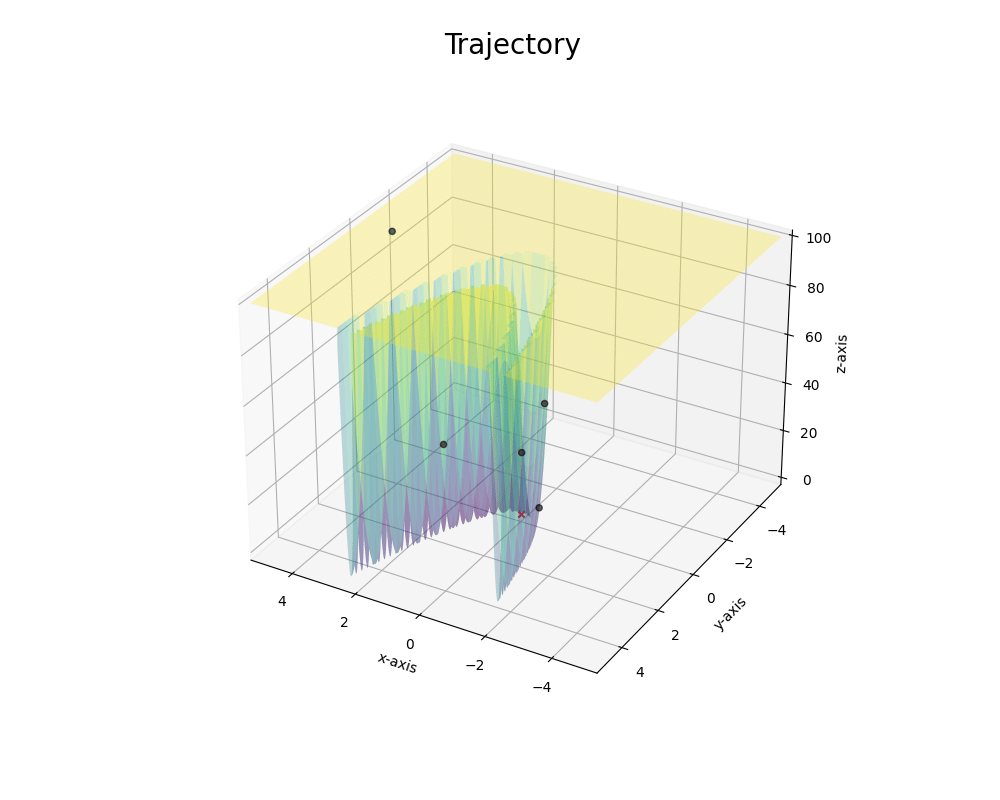

In [27]:
# Plot the 3D Trajectory
Image(data="./Particle Searches/3D_RosenbrockParticlesSearch.gif", width=600)

---